In [1]:
import cv2
import numpy as np

In [2]:
denizbank_tam = cv2.imread("denizbank_tam.jpg", cv2.IMREAD_UNCHANGED)
denizbank_yarim = cv2.imread("denizbank_yarim.jpg", cv2.IMREAD_UNCHANGED)

papara_tam = cv2.imread("papara_tam.jpg", cv2.IMREAD_UNCHANGED)
papara_yarim = cv2.imread("papara_yarim.jpg", cv2.IMREAD_UNCHANGED)

garantibbva_tam = cv2.imread("garantibbva_tam.jpg", cv2.IMREAD_UNCHANGED)
garantibbva_yarim = cv2.imread("garantibbva_yarim.jpg", cv2.IMREAD_UNCHANGED)

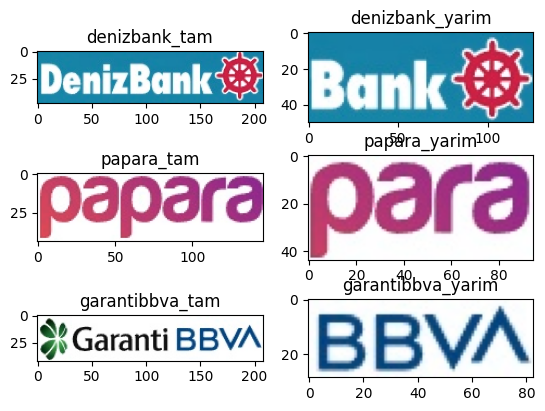

In [3]:
import matplotlib.pyplot as plt

# Create a 2x6 grid of subplots
fig, axes = plt.subplots(3, 2)

# Set titles
axes[0, 0].set_title("denizbank_tam")
axes[0, 1].set_title("denizbank_yarim")
axes[1, 0].set_title("papara_tam")
axes[1, 1].set_title("papara_yarim")
axes[2, 0].set_title("garantibbva_tam")
axes[2, 1].set_title("garantibbva_yarim")

# Display images
axes[0, 0].imshow(denizbank_tam)
axes[0, 1].imshow(denizbank_yarim)
axes[1, 0].imshow(papara_tam)
axes[1, 1].imshow(papara_yarim)
axes[2, 0].imshow(garantibbva_tam)
axes[2, 1].imshow(garantibbva_yarim)

# Show the plot
plt.show()

In [4]:
def matcher(img1, img2):
    sift = cv2.SIFT_create() 


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)
    

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1,img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3),plt.show()


    return (len(good_matches) / (len(kp1))) * 100

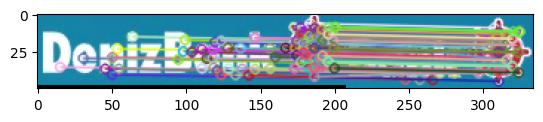

62.091503267973856


In [5]:
match_score = matcher(denizbank_tam, denizbank_yarim)
print(match_score)

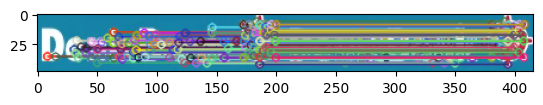

100.0


In [6]:
match_score = matcher(denizbank_tam, denizbank_tam)
print(match_score)

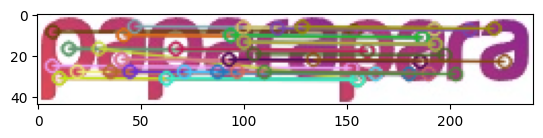

66.0377358490566


In [7]:
match_score = matcher(papara_tam, papara_yarim)
print(match_score)

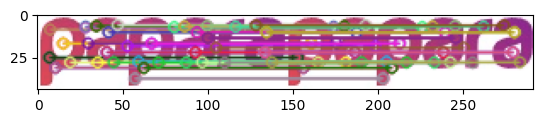

100.0


In [8]:
match_score = matcher(papara_tam, papara_tam)
print(match_score)

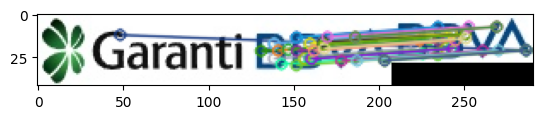

23.728813559322035


In [9]:
match_score = matcher(garantibbva_tam, garantibbva_yarim)
print(match_score)

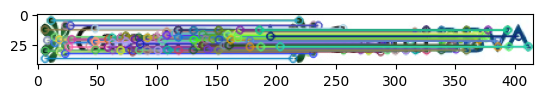

100.0


In [10]:
match_score = matcher(garantibbva_tam, garantibbva_tam)
print(match_score)

Görüldüğü üzere tam logolar %100 match oranı ile eşleşirken yarım logolar daha düşük bir yüzde ile eşleşiyor</br>
Daha fazla örnek çıkartıp belirli bir threshold üzerinde ise doğruluğu belirlenebilir.</br>
Daha fazla geliştirme için gerekli çalışmaları tamamlamış oldum</br>
Daha fazla logo ve varyasyon üzerinde denenerek bir threshold belirlenmesi gerekiyor.</br>
